In [95]:
#Loading the csv file in to jupyter notebook. and importing necessary tools
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [96]:
#Using the bank3 data
df_bank_3 = pd.read_csv('bank3.csv')
df_bank_3

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
595,37,technician,married,secondary,28,no,no,2,0,unknown,no
596,34,management,single,tertiary,404,yes,no,6,0,unknown,no
597,40,unemployed,married,secondary,3430,yes,no,3,0,unknown,no
598,40,management,married,secondary,99,no,no,5,0,unknown,no


In [97]:
#Removing the deposit column so as to ignore it!!
df_bank_3.drop('deposit', inplace = True, axis = 1)
df_bank_3

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown
1,56,admin.,married,secondary,45,no,no,1,0,unknown
2,41,technician,married,secondary,1270,yes,no,1,0,unknown
3,55,services,married,secondary,2476,yes,no,1,0,unknown
4,54,admin.,married,tertiary,184,no,no,2,0,unknown
...,...,...,...,...,...,...,...,...,...,...
595,37,technician,married,secondary,28,no,no,2,0,unknown
596,34,management,single,tertiary,404,yes,no,6,0,unknown
597,40,unemployed,married,secondary,3430,yes,no,3,0,unknown
598,40,management,married,secondary,99,no,no,5,0,unknown


In [98]:
df_bank_3.isna().any()

age          False
job          False
marital      False
education    False
balance      False
housing      False
loan         False
campaign     False
previous     False
poutcome     False
dtype: bool

In [99]:
df_bank_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        600 non-null    int64 
 1   job        600 non-null    object
 2   marital    600 non-null    object
 3   education  600 non-null    object
 4   balance    600 non-null    int64 
 5   housing    600 non-null    object
 6   loan       600 non-null    object
 7   campaign   600 non-null    int64 
 8   previous   600 non-null    int64 
 9   poutcome   600 non-null    object
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [100]:
df_bank_3['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [101]:
df_bank_3['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [102]:
df_bank_3['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [103]:
df_bank_3['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [104]:
df_bank_3["campaign"] = df_bank_3["campaign"].astype('category')
df_bank_3["job"] = df_bank_3["job"].astype('category')
df_bank_3["marital"] = df_bank_3["marital"].astype('category')
df_bank_3["education"] = df_bank_3["education"].astype('category')
df_bank_3["housing"] = df_bank_3["housing"].astype('category')
df_bank_3["loan"] = df_bank_3["loan"].astype('category')
df_bank_3["poutcome"] = df_bank_3["poutcome"].astype('category')
df_bank_3

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown
1,56,admin.,married,secondary,45,no,no,1,0,unknown
2,41,technician,married,secondary,1270,yes,no,1,0,unknown
3,55,services,married,secondary,2476,yes,no,1,0,unknown
4,54,admin.,married,tertiary,184,no,no,2,0,unknown
...,...,...,...,...,...,...,...,...,...,...
595,37,technician,married,secondary,28,no,no,2,0,unknown
596,34,management,single,tertiary,404,yes,no,6,0,unknown
597,40,unemployed,married,secondary,3430,yes,no,3,0,unknown
598,40,management,married,secondary,99,no,no,5,0,unknown


In [105]:
df_bank_3["campaign"] = df_bank_3["campaign"].cat.codes
df_bank_3["job"] = df_bank_3["job"].cat.codes
df_bank_3["marital"] = df_bank_3["marital"].cat.codes
df_bank_3["education"] = df_bank_3["education"].cat.codes
df_bank_3["housing"] = df_bank_3["housing"].cat.codes
df_bank_3["loan"] = df_bank_3["loan"].cat.codes
df_bank_3["poutcome"] = df_bank_3["poutcome"].cat.codes
df_bank_3 

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,0,1,1,2343,1,0,0,0,3
1,56,0,1,1,45,0,0,0,0,3
2,41,9,1,1,1270,1,0,0,0,3
3,55,7,1,1,2476,1,0,0,0,3
4,54,0,1,2,184,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
595,37,9,1,1,28,0,0,1,0,3
596,34,4,2,2,404,1,0,5,0,3
597,40,10,1,1,3430,1,0,2,0,3
598,40,4,1,1,99,0,0,4,0,3


In [106]:
kmeans = KMeans(n_clusters=5).fit(df_bank_3)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)


[[3.94676923e+01 3.97230769e+00 1.12307692e+00 1.13538462e+00
  1.28581538e+02 7.41538462e-01 1.47692308e-01 1.51692308e+00
  2.15384615e-01 2.75384615e+00]
 [4.34500000e+01 4.57500000e+00 1.07500000e+00 1.50000000e+00
  5.69277500e+03 5.75000000e-01 1.75000000e-01 1.82500000e+00
  1.00000000e-01 2.90000000e+00]
 [4.14769231e+01 5.01538462e+00 1.12307692e+00 1.40000000e+00
  2.92158462e+03 7.23076923e-01 6.15384615e-02 1.56923077e+00
  3.53846154e-01 2.66153846e+00]
 [3.20000000e+01 4.00000000e+00 1.25000000e+00 2.00000000e+00
  1.18650000e+04 5.00000000e-01 0.00000000e+00 7.50000000e-01
  5.00000000e-01 2.50000000e+00]
 [4.05722892e+01 4.30722892e+00 1.17469880e+00 1.15060241e+00
  1.04428916e+03 6.62650602e-01 1.50602410e-01 1.62048193e+00
  4.63855422e-01 2.80120482e+00]]
[2 0 4 2 0 0 4 0 0 1 0 0 0 0 4 2 4 0 0 0 4 2 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 4 4 0 4 2 0 2 2 4 0 4 0 4 2 4 4 4 4 2 0 1 1 4 0 0 0 0 0 0 1 0 3 0 2
 4 0 0 0 0 0 0 0 0 0 0 2 1 4 4 4 4 4 0 4 4 0 4 0 1 0 0 0 0 2 0 0

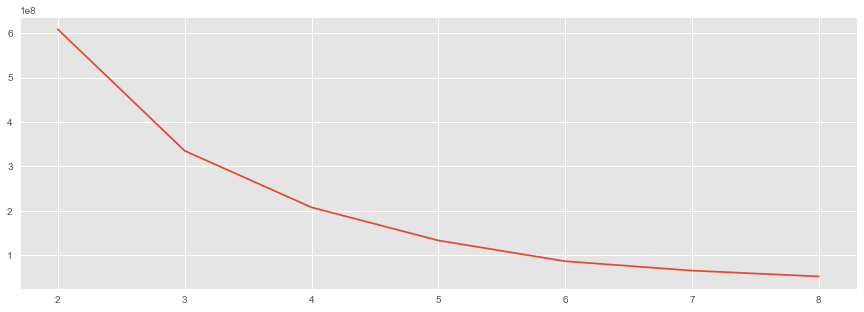

In [107]:
errors = []
for k in range(2, 9):
    kmeans1 = KMeans(n_clusters=k)
    kmeans1.fit(df_bank_3)
    errors.append(kmeans1.inertia_)
    
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 9), errors)
plt.grid(True)

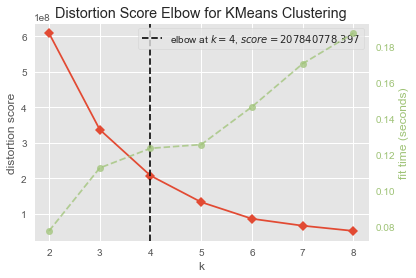

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(2,9))

visualizer.fit(df_bank_3)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
#The optimum k for this set of clusters for this dataset is k= 4 
#HEre the n number of clusters during the model training was 5 and k for -mean ranged between 2 and 9. 

In [109]:
print(centroids[:, 0])

[39.46769231 43.45       41.47692308 32.         40.57228916]


In [110]:
df_bank_3

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,0,1,1,2343,1,0,0,0,3
1,56,0,1,1,45,0,0,0,0,3
2,41,9,1,1,1270,1,0,0,0,3
3,55,7,1,1,2476,1,0,0,0,3
4,54,0,1,2,184,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
595,37,9,1,1,28,0,0,1,0,3
596,34,4,2,2,404,1,0,5,0,3
597,40,10,1,1,3430,1,0,2,0,3
598,40,4,1,1,99,0,0,4,0,3


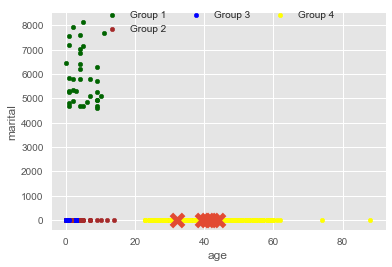

In [92]:
df_bank_3['labels'] = labels

group1 = df_bank_3[df_bank_3['labels']==1].plot( kind='scatter', x='job', y='balance', color='DarkGreen', label="Group 1" )
group2 = df_bank_3[df_bank_3['labels']==0].plot( kind='scatter', x='campaign', y='education', color='Brown', ax=group1, label="Group 2" )
group3 = df_bank_3[df_bank_3['labels']==2].plot( kind='scatter', x='poutcome', y='loan', color='Blue', ax=group2, label="Group 3" )
group4 = df_bank_3[df_bank_3['labels']==3].plot( kind='scatter', x='age', y='marital', color='Yellow', ax=group3, label="Group 4" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[ :, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
  
plt.show()

In [31]:
#For the Hierarchial clustering!!!

In [111]:
df_bank_3

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,0,1,1,2343,1,0,0,0,3
1,56,0,1,1,45,0,0,0,0,3
2,41,9,1,1,1270,1,0,0,0,3
3,55,7,1,1,2476,1,0,0,0,3
4,54,0,1,2,184,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
595,37,9,1,1,28,0,0,1,0,3
596,34,4,2,2,404,1,0,5,0,3
597,40,10,1,1,3430,1,0,2,0,3
598,40,4,1,1,99,0,0,4,0,3


In [112]:
from sklearn.preprocessing import normalize
scaled_bank_data = normalize(df_bank_3)
scaled_bank_data = pd.DataFrame(scaled_bank_data, columns=df_bank_3.columns)
scaled_bank_data.head()

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,0.025173,0.000000,0.000427,0.000427,0.999682,0.000427,0.0,0.000000,0.0,0.001280
1,0.778680,0.000000,0.013905,0.013905,0.625725,0.000000,0.0,0.000000,0.0,0.041715
2,0.032266,0.007083,0.000787,0.000787,0.999451,0.000787,0.0,0.000000,0.0,0.002361
3,0.022208,0.002826,0.000404,0.000404,0.999748,0.000404,0.0,0.000000,0.0,0.001211
4,0.281544,0.000000,0.005214,0.010428,0.959336,0.000000,0.0,0.005214,0.0,0.015641


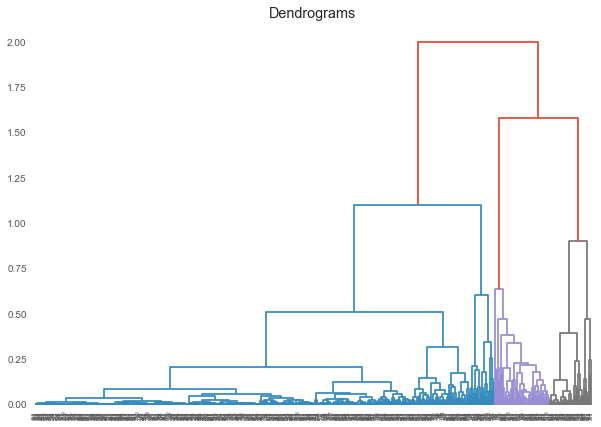

In [114]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_bank_data, method='complete'))

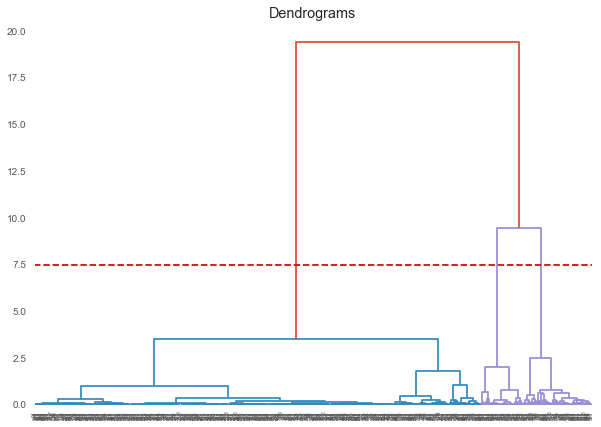

In [118]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_bank_data, method='ward'))
plt.axhline(y=7.5, color='r', linestyle='--')

In [119]:
#Since the line is drawn across the longst vertical column it intersects at three points.
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_bank_data)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,

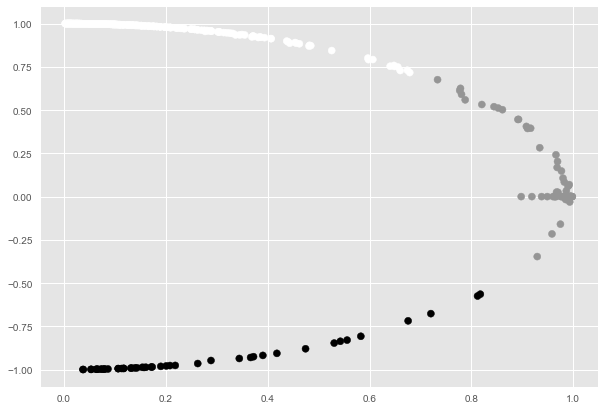

In [135]:

plt.figure(figsize=(10, 7))  
plt.scatter(scaled_bank_data['age'], scaled_bank_data['balance'],c=cluster.labels_) 

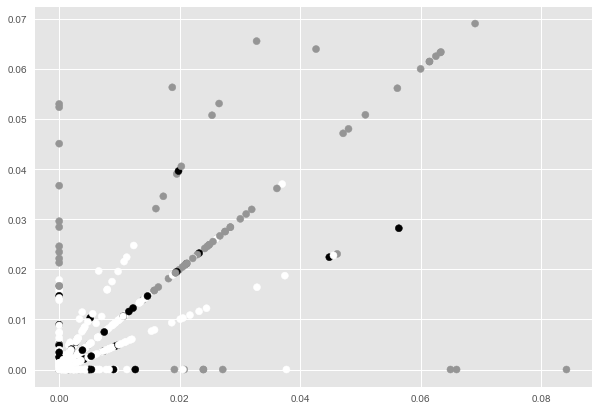

In [136]:

plt.figure(figsize=(10, 7))  
plt.scatter(scaled_bank_data['marital'], scaled_bank_data['education'],c=cluster.labels_) 

In [ ]:
#Q2
#PCA METHOD Principal component analysis for dimensionality reduction. 


In [120]:
df_2 = pd.read_csv('disease.csv', header= 10)
df_2

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [121]:
normalized_data = normalize(df_2.iloc[:,:-1])
normalized_data

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [122]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split            
from sklearn.preprocessing import StandardScaler

In [123]:
df_2.iloc[:,:-1]

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [133]:
pca = PCA(n_components= 2)    #this allows for 60% of the information to be retained. 
X_train_pca = pca.fit(df_2.iloc[:,:-1])

In [134]:
print(pca.explained_variance_ratio_)

[0.88854663 0.06159078]


In [ ]:
#Using the train_test condition as a separate apprach to the same condition. 

In [141]:
feature_cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'] 
X = df_2[feature_cols]
y = df_2['class']
#Let's keep our test size 30 and a random state of 12 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=12)

In [142]:
pca = PCA(n_components= 0.60)     #this allows for 60% of the information to be retained. 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [144]:
X_train_pca.shape  #a single column of 767 values

(767, 1)

In [145]:
X_train_pca #In the form of an array. 

array([[-7.53956496e+01],
       [-7.90106011e+01],
       [ 1.25081020e+00],
       [-1.68675790e+01],
       [ 8.66052321e+01],
       [-7.82249334e+01],
       [ 4.96237934e+01],
       [-8.22403863e+01],
       [-7.94209043e+01],
       [-8.02809790e+01],
       [ 1.10864025e+02],
       [-8.45969149e+01],
       [-8.17684045e+01],
       [-7.87162852e+01],
       [-8.20867528e+01],
       [-7.95103424e+01],
       [ 1.11051458e+01],
       [-7.84512093e+01],
       [-1.72348897e+01],
       [-8.26657760e+01],
       [-7.57763482e+01],
       [-7.80023941e+01],
       [ 8.75145293e+00],
       [ 1.34499513e+02],
       [ 2.66502066e+01],
       [ 4.67052058e+02],
       [-8.18067745e+01],
       [ 2.03323535e+02],
       [-8.28716360e+01],
       [-7.44803170e+01],
       [ 3.89607807e+02],
       [-7.14214153e+00],
       [-7.89755605e+01],
       [ 1.20035088e+02],
       [-8.01758134e+01],
       [-8.01796852e+01],
       [-7.46294936e+01],
       [-8.35625974e+01],
       [-1.7